In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.metrics import classification_report
import lightgbm as lgbm
import xgboost as xgb

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [4]:
from sklearn.model_selection import train_test_split

df_data = pd.read_csv('recleaned_data_stdscle_v2.csv')


In [5]:
df_data.shape

(157104, 29)

In [6]:
#df_data = df_data[df_data['decade'] >= 1940]
df_data = df_data[df_data['decade'] <= 2010]
df_data = df_data.reset_index(drop=True)

In [7]:
df_data.shape

(152834, 29)

In [8]:
df_data_main = df_data.copy(deep=True)

In [9]:
labels = df_data.decade

df_data = df_data.drop(['artists', 'decade','year', 'key', 'popularity', 'loudness', 'acousticness'], axis=1)
df_data.head()

,danceability,duration_ms,energy,explicit,instrumentalness,liveness,mode,speechiness,tempo,valence,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,0.343090,-0.586049,-0.946776,0,-0.578414,0.929594,0,-0.082136,1.085064,0.402700,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.888467,-0.431375,-0.909987,0,1.401622,0.123664,1,-0.352830,-1.045986,-1.213104,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.835630,-0.620337,-1.299951,0,-0.117816,-0.630575,1,-0.378308,0.319193,-1.148472,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.110283,-0.554578,-1.049785,0,-0.566669,-0.304312,1,-0.385208,-1.225561,-0.661830,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.732635,-0.434248,-0.681894,1,-0.579976,-0.671149,0,-0.374061,0.359318,-1.770082,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df_data.columns

Index(['danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness',
       'liveness', 'mode', 'speechiness', 'tempo', 'valence', 'key_0', 'key_1',
       'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9',
       'key_10', 'key_11'],
      dtype='object')

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df_data, labels, test_size=0.20, random_state=2)

In [12]:
X_train.shape, y_train.shape, y_test.shape

((122267, 22), (122267,), (30567,))

## KNN Classifier

In [13]:
#KNN classifier
classifier = KNeighborsClassifier(n_neighbors=27)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
# from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

        1920       0.43      0.26      0.32      1058
        1930       0.41      0.34      0.37      2002
        1940       0.33      0.38      0.35      2804
        1950       0.29      0.38      0.33      3643
        1960       0.29      0.40      0.34      3525
        1970       0.28      0.32      0.30      3632
        1980       0.28      0.29      0.29      3663
        1990       0.30      0.24      0.27      3727
        2000       0.25      0.10      0.15      2445
        2010       0.51      0.45      0.48      4068

    accuracy                           0.33     30567
   macro avg       0.34      0.32      0.32     30567
weighted avg       0.33      0.33      0.32     30567

0.32718290967383123


In [14]:
cr_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
cr_df

,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,accuracy,macro avg,weighted avg
precision,0.431962,0.414559,0.330028,0.288521,0.290070,0.279019,0.283024,0.304631,0.254803,0.508042,0.327183,0.338466,0.332421
recall,0.258034,0.335664,0.379815,0.382926,0.399433,0.316355,0.291291,0.238261,0.103067,0.450344,0.327183,0.315519,0.327183
f1-score,0.323077,0.370963,0.353175,0.329087,0.336078,0.296516,0.287098,0.267389,0.146768,0.477456,0.327183,0.318761,0.323375
support,1058.000000,2002.000000,2804.000000,3643.000000,3525.000000,3632.000000,3663.000000,3727.000000,2445.000000,4068.000000,0.327183,30567.000000,30567.000000


## XGB and LGBM

In [15]:
model_lgbm = lgbm.LGBMClassifier()

model_lgbm.fit(X_train, y_train)

model_lgbm.score(X_test, y_test)

y_pred = model_lgbm.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        1920       0.61      0.36      0.45      1058
        1930       0.50      0.39      0.44      2002
        1940       0.40      0.47      0.43      2804
        1950       0.33      0.46      0.39      3643
        1960       0.36      0.44      0.40      3525
        1970       0.35      0.37      0.36      3632
        1980       0.36      0.34      0.35      3663
        1990       0.37      0.28      0.32      3727
        2000       0.32      0.14      0.19      2445
        2010       0.52      0.56      0.54      4068

    accuracy                           0.39     30567
   macro avg       0.41      0.38      0.39     30567
weighted avg       0.40      0.39      0.39     30567



In [16]:

print(accuracy_score(y_test, y_pred))

0.3922203683711192


In [17]:
lgbm_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
lgbm_df

,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,accuracy,macro avg,weighted avg
precision,0.605431,0.501271,0.397885,0.331227,0.361310,0.345787,0.355971,0.365431,0.321058,0.524914,0.39222,0.411028,0.395268
recall,0.358223,0.394106,0.469686,0.460335,0.444539,0.369493,0.337701,0.283069,0.139059,0.561947,0.39222,0.381816,0.392220
f1-score,0.450119,0.441275,0.430815,0.385252,0.398626,0.357247,0.346596,0.319020,0.194064,0.542799,0.39222,0.386581,0.386527
support,1058.000000,2002.000000,2804.000000,3643.000000,3525.000000,3632.000000,3663.000000,3727.000000,2445.000000,4068.000000,0.39222,30567.000000,30567.000000


In [18]:
model_lgbm.score(X_test, y_test)

0.3922203683711192

In [19]:
model_xgb = xgb.XGBClassifier()

model_xgb.fit(X_train, y_train)

model_xgb.score(X_test, y_test)

y_pred = model_xgb.predict(X_test)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

/home/tserg/miniconda3/envs/it5006/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:05:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

        1920       0.61      0.37      0.46      1058
        1930       0.51      0.39      0.44      2002
        1940       0.39      0.47      0.43      2804
        1950       0.33      0.44      0.38      3643
        1960       0.37      0.44      0.40      3525
        1970       0.35      0.38      0.36      3632
        1980       0.36      0.34      0.35      3663
        1990       0.36      0.29      0.32      3727
        2000       0.32      0.16      0.21      2445
        2010       0.53      0.57      0.55      4068

    accuracy                           0.39     30567
   macro avg       0.41      0.38      0.39     30567
weighted avg       0.40      0.39      0.39

In [20]:
xgb_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
xgb_df

,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,accuracy,macro avg,weighted avg
precision,0.605304,0.506197,0.390564,0.332441,0.366362,0.347826,0.358739,0.363543,0.323967,0.533486,0.394281,0.412843,0.397359
recall,0.366730,0.387612,0.466476,0.443316,0.443688,0.376652,0.341796,0.285216,0.160327,0.571780,0.394281,0.384359,0.394281
f1-score,0.456739,0.439038,0.425158,0.379955,0.401334,0.361666,0.350063,0.319651,0.214501,0.551970,0.394281,0.390008,0.389645
support,1058.000000,2002.000000,2804.000000,3643.000000,3525.000000,3632.000000,3663.000000,3727.000000,2445.000000,4068.000000,0.394281,30567.000000,30567.000000


## Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(verbose=1)

rfc.fit(X_train, y_train)


rfc.score(X_test, y_test)

y_pred = rfc.predict(X_test)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   23.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


              precision    recall  f1-score   support

        1920       0.68      0.37      0.48      1058
        1930       0.53      0.39      0.45      2002
        1940       0.39      0.46      0.42      2804
        1950       0.34      0.47      0.39      3643
        1960       0.36      0.46      0.40      3525
        1970       0.33      0.36      0.35      3632
        1980       0.34      0.34      0.34      3663
        1990       0.35      0.27      0.31      3727
        2000       0.30      0.13      0.18      2445
        2010       0.53      0.55      0.54      4068

    accuracy                           0.39     30567
   macro avg       0.42      0.38      0.39     30567
weighted avg       0.40      0.39      0.38     30567

0.39006117708640037


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished


In [22]:
rf_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
rf_df

,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,accuracy,macro avg,weighted avg
precision,0.682927,0.534565,0.394971,0.337200,0.358160,0.334881,0.344656,0.353023,0.304559,0.529898,0.390061,0.417484,0.395391
recall,0.370510,0.390110,0.459344,0.470766,0.463830,0.357379,0.340704,0.270995,0.128425,0.551131,0.390061,0.380319,0.390061
f1-score,0.480392,0.451054,0.424732,0.392943,0.404203,0.345765,0.342669,0.306618,0.180667,0.540306,0.390061,0.386935,0.384467
support,1058.000000,2002.000000,2804.000000,3643.000000,3525.000000,3632.000000,3663.000000,3727.000000,2445.000000,4068.000000,0.390061,30567.000000,30567.000000


# Artist analysis

In [23]:
import matplotlib.pyplot as plt

In [24]:
df_data_main['artists_count'] = df_data_main['artists'].apply(lambda x: len(x.split(",")))

In [25]:
df_decade_unique_artists = df_data_main.groupby(df_data_main['decade'], as_index=False)['artists'].apply(lambda x: len(list(np.unique(x))))
df_decade_unique_artists

,decade,artists
0,1920,716
1,1930,1710
2,1940,3434
3,1950,4353
4,1960,2631
5,1970,2884
6,1980,3862
7,1990,5707
8,2000,5098
9,2010,9546


In [26]:
df_data_decade_count = df_data_main.groupby(df_data_main['decade']).count()
df_data_decade_count = df_data_decade_count.reset_index()
df_data_decade_count = df_data_decade_count[['decade', 'acousticness']]
df_data_decade_count = df_data_decade_count.rename(columns={'acousticness':'count'})
df_data_decade_count

,decade,count
0,1920,5160
1,1930,10061
2,1940,13976
3,1950,18386
4,1960,17949
5,1970,18169
6,1980,18366
7,1990,18555
8,2000,12309
9,2010,19903


In [27]:
df_data_decade_count = df_data_decade_count.join(df_decade_unique_artists, lsuffix='_a', rsuffix='b')
df_data_decade_count = df_data_decade_count.drop(['decade_a'], axis=1)


In [28]:
df_data_decade_count['avg_song_per_artist'] = df_data_decade_count['count'] / df_data_decade_count['artists']
df_data_decade_count = df_data_decade_count.rename(columns={'decadeb': 'decade'})

df_data_decade_count

,count,decade,artists,avg_song_per_artist
0,5160,1920,716,7.206704
1,10061,1930,1710,5.883626
2,13976,1940,3434,4.069889
3,18386,1950,4353,4.223754
4,17949,1960,2631,6.822121
5,18169,1970,2884,6.299931
6,18366,1980,3862,4.755567
7,18555,1990,5707,3.251270
8,12309,2000,5098,2.414476
9,19903,2010,9546,2.084957


In [29]:
xgb_df = xgb_df.transpose()
xgb_df.drop(xgb_df.tail(3).index, inplace=True)
xgb_df = xgb_df.reset_index()

In [30]:
lgbm_df = lgbm_df.transpose()
lgbm_df.drop(lgbm_df.tail(3).index, inplace=True)
lgbm_df = lgbm_df.reset_index()


In [31]:
rf_df = rf_df.transpose()
rf_df.drop(rf_df.tail(3).index, inplace=True)
rf_df = rf_df.reset_index()


In [32]:
df_data_decade_count = df_data_decade_count.join(xgb_df['f1-score']).rename(columns={'f1-score': 'xgb_f1'})
df_data_decade_count = df_data_decade_count.join(lgbm_df['f1-score']).rename(columns={'f1-score': 'lgbm_f1'})
df_data_decade_count = df_data_decade_count.join(rf_df['f1-score']).rename(columns={'f1-score': 'rf_f1'})

In [33]:
df_data_decade_count

,count,decade,artists,avg_song_per_artist,xgb_f1,lgbm_f1,rf_f1
0,5160,1920,716,7.206704,0.456739,0.450119,0.480392
1,10061,1930,1710,5.883626,0.439038,0.441275,0.451054
2,13976,1940,3434,4.069889,0.425158,0.430815,0.424732
3,18386,1950,4353,4.223754,0.379955,0.385252,0.392943
4,17949,1960,2631,6.822121,0.401334,0.398626,0.404203
5,18169,1970,2884,6.299931,0.361666,0.357247,0.345765
6,18366,1980,3862,4.755567,0.350063,0.346596,0.342669
7,18555,1990,5707,3.251270,0.319651,0.319020,0.306618
8,12309,2000,5098,2.414476,0.214501,0.194064,0.180667
9,19903,2010,9546,2.084957,0.551970,0.542799,0.540306


In [34]:
df_data_decade_count['diversity'] = 1 / df_data_decade_count['avg_song_per_artist']

Text(0.5, 1.0, 'Artist diversity against RF F1 score')

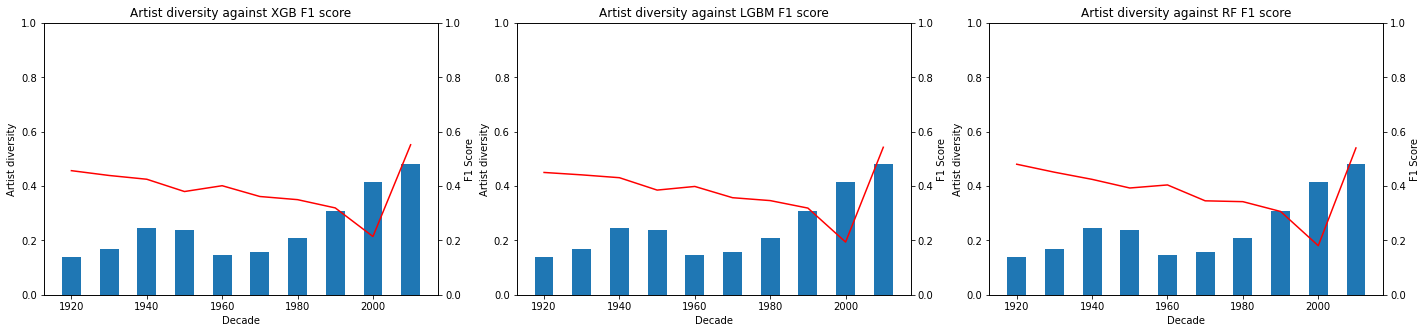

In [35]:
fig, ax = plt.subplots(1, 3, figsize=(24, 5))

ax[0].bar(df_data_decade_count['decade'], df_data_decade_count['diversity'], width=5)

ax1_2 = ax[0].twinx()
ax1_2.plot(df_data_decade_count['decade'], df_data_decade_count['xgb_f1'], color='red')
ax1_2.set_ylim([0,1])
ax1_2.set_ylabel('F1 Score')
ax[0].set_ylim([0,1])
ax[0].set_xlabel('Decade')
ax[0].set_ylabel('Artist diversity')
ax[0].set_title("Artist diversity against XGB F1 score")

ax[1].bar(df_data_decade_count['decade'], df_data_decade_count['diversity'], width=5)

ax2_2 = ax[1].twinx()
ax2_2.plot(df_data_decade_count['decade'], df_data_decade_count['lgbm_f1'], color='red')
ax2_2.set_ylim([0,1])
ax2_2.set_ylabel('F1 Score')
ax[1].set_ylim([0,1])
ax[1].set_xlabel('Decade')
ax[1].set_ylabel('Artist diversity')
ax[1].set_title("Artist diversity against LGBM F1 score")

ax[2].bar(df_data_decade_count['decade'], df_data_decade_count['diversity'], width=5)

ax3_2 = ax[2].twinx()
ax3_2.plot(df_data_decade_count['decade'], df_data_decade_count['rf_f1'], color='red')
ax3_2.set_ylim([0,1])
ax3_2.set_ylabel('F1 Score')
ax[2].set_ylim([0,1])
ax[2].set_xlabel('Decade')
ax[2].set_ylabel('Artist diversity')
ax[2].set_title("Artist diversity against RF F1 score")



# Helper

In [16]:
from sklearn.metrics import accuracy_score

global models 

models = [classifier, model_lgbm, model_xgb, rfc]

def test_model_results(X_train, X_test, y_train, y_test):
    
    result = {}
    
    for model in models:
    
        model.fit(X_train, y_train)
        model.score(X_test, y_test)
        y_pred = model.predict(X_test)
        result[type(model).__name__] = accuracy_score(y_test, y_pred)
    
    return result

In [25]:
result = test_model_results(X_train, X_test, y_train, y_test)

print(result)

/home/tserg/miniconda3/envs/it5006/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:50:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   23.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'KNeighborsClassifier': 0.3877120953384442, 'LGBMClassifier': 0.45547360389492425, 'XGBClassifier': 0.4556189368891473, 'RandomForestClassifier': 0.45576426988337027}


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished


# Selected

In [40]:
df_data_selected = df_data_selected[['loudness', 'acousticness', 'energy']]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(df_data_selected, labels, test_size=0.20, random_state=1)

In [42]:
X_train

,loudness,acousticness,energy
34698,0.008775,0.985027,-0.902629
92138,-0.935282,-1.155852,0.094355
38256,-1.263420,0.550050,-0.917344
53736,-0.728213,1.145836,-1.060822
103506,1.320444,-1.105500,1.694680
...,...,...,...
73349,0.932389,-0.583527,0.929467
109259,-0.510395,1.074658,-0.994601
50057,-0.217150,1.050932,-0.586243
5192,-3.007201,1.301374,-1.721922


In [43]:
result = test_model_results(X_train, X_test, y_train, y_test)

print(result)

/home/tserg/miniconda3/envs/it5006/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:06:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   13.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'KNeighborsClassifier': 0.3062166188278894, 'LGBMClassifier': 0.33081422810013444, 'XGBClassifier': 0.3284889001925662, 'RandomForestClassifier': 0.2925189841223704}


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished


# Standard Scaler on all columns except duration_ms, loudness and tempo

scaling should be done on all columns after excluding 1920s and 1930s data but it does not improve


In [23]:
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, MinMaxScaler

df_data_scaled = df_data.copy(deep=True)

'''
cols = ['acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'speechiness', 'valence']

scaler = StandardScaler()

df_data_scaled.loc[df_data_scaled.index, cols] = scaler.fit_transform(df_data_scaled[cols]) 

'''

"\ncols = ['acousticness', 'danceability', 'energy',\n       'instrumentalness', 'liveness', 'speechiness', 'valence']\n\nscaler = StandardScaler()\n\ndf_data_scaled.loc[df_data_scaled.index, cols] = scaler.fit_transform(df_data_scaled[cols]) \n\n"

In [24]:
'''
X_train, X_test, y_train, y_test = train_test_split(df_data_scaled, labels, test_size=0.20, random_state=1)

results = test_model_results(X_train, X_test, y_train, y_test)

print(results)
'''

'\nX_train, X_test, y_train, y_test = train_test_split(df_data_scaled, labels, test_size=0.20, random_state=1)\n\nresults = test_model_results(X_train, X_test, y_train, y_test)\n\nprint(results)\n'

# Subset without mode and key

In [25]:
df_data_wo_modekey = df_data_scaled.drop(['mode','key_0', 'key_1', 'key_2', 'key_3',
       'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10',
       'key_11'], axis=1)

In [26]:
df_data_wo_modekey.head

<bound method NDFrame.head of         acousticness  danceability  duration_ms    energy  explicit  \
0           1.280284      0.440363    -1.842277 -1.547909         0   
1           1.224923     -0.807020    -1.072759 -1.307309         0   
2          -0.876148      1.029723    -1.267532 -1.498612         1   
3           0.987663     -0.709747    -1.896113 -0.891592         0   
4           1.301374     -0.555255    -0.602815 -1.226373         0   
...              ...           ...          ...       ...       ...   
137608      0.905940      1.018279    -0.720039 -0.891592         0   
137609     -1.026413      2.340047     0.452417 -0.354472         1   
137610     -1.268155     -0.126109     0.664422  1.216422         0   
137611     -0.217092      1.018279    -1.252136  0.171612         1   
137612     -1.034322      0.680685     0.308764  0.351879         0   

        instrumentalness  liveness  loudness  speechiness     tempo   valence  
0              -0.563588  0.701711 -0

In [27]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df_data_wo_modekey, labels, test_size=0.20, random_state=1)

In [28]:
results = test_model_results(X_train_2, X_test_2, y_train_2, y_test_2)

print(results)

/home/tserg/miniconda3/envs/it5006/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:24:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   29.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'KNeighborsClassifier': 0.40933037822911744, 'LGBMClassifier': 0.452566944010464, 'XGBClassifier': 0.452276278022018, 'RandomForestClassifier': 0.4509682810740108}


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished


# Combine energy and loudness, acousticness and loudness

In [29]:
df_data_combined = df_data.copy(deep=True)

In [30]:
df_data_combined['loudness_acousticness'] = df_data_combined['loudness'] - df_data_combined['acousticness']

min_max_scaler = MinMaxScaler()

df_data_combined['loudness_acousticness'] = min_max_scaler.fit_transform(df_data_combined[['loudness_acousticness']])
df_data_combined = df_data_combined.drop(['loudness', 'acousticness'], axis=1)

In [31]:
df_data_combined_2 = df_data.copy(deep=True)
df_data_combined_2['loudness_energy'] = df_data_combined_2['loudness'] + df_data_combined_2['energy']

df_data_combined_2['loudness_energy'] = min_max_scaler.fit_transform(df_data_combined_2[['loudness_energy']])

df_data_combined_2 = df_data_combined_2.drop(['loudness', 'energy'], axis=1)

In [32]:
df_data_combined_2['loudness_energy'].describe()

count    137613.000000
mean          0.697693
std           0.124655
min           0.000000
25%           0.612492
50%           0.708142
75%           0.796320
max           1.000000
Name: loudness_energy, dtype: float64

In [33]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(df_data_combined, labels, test_size=0.20, random_state=1)
results = test_model_results(X_train_3, X_test_3, y_train_3, y_test_3)

print(results)

/home/tserg/miniconda3/envs/it5006/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:27:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   21.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'KNeighborsClassifier': 0.3493078516150129, 'LGBMClassifier': 0.42869599970933403, 'XGBClassifier': 0.4289139992006685, 'RandomForestClassifier': 0.4221923482178542}


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished


In [34]:
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(df_data_combined_2, labels, test_size=0.20, random_state=1)
results = test_model_results(X_train_4, X_test_4, y_train_4, y_test_4)

print(results)

/home/tserg/miniconda3/envs/it5006/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:29:55] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   21.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'KNeighborsClassifier': 0.3593721614649566, 'LGBMClassifier': 0.44370163136286017, 'XGBClassifier': 0.44388329760563894, 'RandomForestClassifier': 0.43886930930494494}


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished


# Combine energy, loudness and acousticness using PCA

In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)

In [36]:
df_data_combined_3 = df_data.copy(deep=True)

df_subset = df_data_combined_3[['loudness', 'acousticness', 'energy']]
df_subset

,loudness,acousticness,energy
0,-0.746894,1.280284,-1.547909
1,-2.096100,1.224923,-1.307309
2,-1.901543,-0.876148,-1.498612
3,-0.806106,0.987663,-0.891592
4,-1.345190,1.301374,-1.226373
...,...,...,...
137608,-0.180319,0.905940,-0.891592
137609,0.781713,-1.026413,-0.354472
137610,0.969925,-1.268155,1.216422
137611,-0.334519,-0.217092,0.171612


In [37]:

df_subset = pca.fit_transform(df_subset)

df_data_combined_3 = df_data_combined_3.drop(['loudness', 'acousticness'], axis=1)
df_subset = pd.DataFrame(df_subset, columns=['ela_combined'])
df_subset
#df_data_scaled_combined_3.join(df_subset)

,ela_combined
0,2.194376
1,2.762467
2,1.604272
3,1.658076
4,2.338666
...,...
137608,1.265748
137609,-0.674977
137610,-1.886352
137611,0.068240


In [38]:
df_data_combined_3 = df_data_combined_3.join(df_subset)

In [39]:
X_train_combined_3, X_test_combined_, y_train_combined_3, y_test_combined_3 = train_test_split(df_data_combined_3, labels, test_size=0.20, random_state=1)
results = test_model_results(X_train_combined_3, X_test_combined_, y_train_combined_3, y_test_combined_3)

print(results)

/home/tserg/miniconda3/envs/it5006/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:32:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   21.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'KNeighborsClassifier': 0.36478581549976385, 'LGBMClassifier': 0.42491734185953567, 'XGBClassifier': 0.4237910111543073, 'RandomForestClassifier': 0.4182683573738328}


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished


# Exclude liveness

In [40]:
df_data_5 = df_data.drop(['liveness'], axis=1)

In [41]:
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(df_data_5, labels, test_size=0.20, random_state=1)
results = test_model_results(X_train_5, X_test_5, y_train_5, y_test_5)

print(results)

/home/tserg/miniconda3/envs/it5006/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:35:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   21.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'KNeighborsClassifier': 0.3925444173963594, 'LGBMClassifier': 0.45438360643825165, 'XGBClassifier': 0.45485593866947643, 'RandomForestClassifier': 0.45358427497002507}


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished


# Exclude speechiness

In [42]:
df_data_5_2 = df_data.drop(['speechiness'], axis=1)

In [43]:
X_train_5_2, X_test_5_2, y_train_5_2, y_test_5_2 = train_test_split(df_data_5_2, labels, test_size=0.20, random_state=1)
results = test_model_results(X_train_5_2, X_test_5_2, y_train_5_2, y_test_5_2)

print(results)

/home/tserg/miniconda3/envs/it5006/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:38:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   22.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'KNeighborsClassifier': 0.38153544308396614, 'LGBMClassifier': 0.4450822948079788, 'XGBClassifier': 0.44751662246121426, 'RandomForestClassifier': 0.44442829633397524}


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished


# Exclude valence and duration, liveness

In [44]:
df_data_6 = df_data_5.copy(deep=True)

In [45]:
df_data_6 = df_data_6.drop(['valence', 'duration_ms'], axis=1)

In [46]:
X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(df_data_6, labels, test_size=0.20, random_state=1)
results = test_model_results(X_train_6, X_test_6, y_train_6, y_test_6)

print(results)

/home/tserg/miniconda3/envs/it5006/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:41:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   21.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'KNeighborsClassifier': 0.35519383788104497, 'LGBMClassifier': 0.4139810340442539, 'XGBClassifier': 0.4174690259056062, 'RandomForestClassifier': 0.40864004650655816}


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished


# Exclude speechiness, instrumentalness, liveness and acousticness

In [47]:
df_data_7 = df_data.drop(['speechiness', 'liveness', 'instrumentalness', 'acousticness'], axis=1)

In [48]:
df_data_7.head

<bound method NDFrame.head of         danceability  duration_ms    energy  explicit  loudness  mode  \
0           0.440363    -1.842277 -1.547909         0 -0.746894     1   
1          -0.807020    -1.072759 -1.307309         0 -2.096100     1   
2           1.029723    -1.267532 -1.498612         1 -1.901543     0   
3          -0.709747    -1.896113 -0.891592         0 -0.806106     0   
4          -0.555255    -0.602815 -1.226373         0 -1.345190     1   
...              ...          ...       ...       ...       ...   ...   
137608      1.018279    -0.720039 -0.891592         0 -0.180319     1   
137609      2.340047     0.452417 -0.354472         1  0.781713     1   
137610     -0.126109     0.664422  1.216422         0  0.969925     1   
137611      1.018279    -1.252136  0.171612         1 -0.334519     0   
137612      0.680685     0.308764  0.351879         0  0.611124     0   

           tempo   valence  key_0  key_1  key_2  key_3  key_4  key_5  key_6  \
0      -0.6021

In [49]:
X_train_7, X_test_7, y_train_7, y_test_7 = train_test_split(df_data_7, labels, test_size=0.20, random_state=1)
results = test_model_results(X_train_7, X_test_7, y_train_7, y_test_7)

print(results)

/home/tserg/miniconda3/envs/it5006/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:43:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   18.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'KNeighborsClassifier': 0.35635650183482903, 'LGBMClassifier': 0.3982124041710569, 'XGBClassifier': 0.39813973767394545, 'RandomForestClassifier': 0.3929440831304727}


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished


# PCA

In [50]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

df_data_pca = df_data.copy(deep=True)

df_data_pca = pca.fit_transform(df_data_pca)

In [51]:
X_train_8, X_test_8, y_train_8, y_test_8 = train_test_split(df_data_pca, labels, test_size=0.20, random_state=1)
results = test_model_results(X_train_8, X_test_8, y_train_8, y_test_8)

print(results)

/home/tserg/miniconda3/envs/it5006/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:44:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   14.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'KNeighborsClassifier': 0.2608727246303092, 'LGBMClassifier': 0.2881953275442357, 'XGBClassifier': 0.28089234458452933, 'RandomForestClassifier': 0.24910075209824512}


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished
